# Pandas Practice 3

As a data scientist, you don't always have to invent the wheel from scratch. The great advantage of Python is that smart<br> people before you spend a lot of energy on making life easier for the next programers. So please, make your life easier<br> and use code that has already been implemented, don't call it "copying" but "kindly borrowing" of other people's code.<br> If you copy whole functions or great graphs in the future, don't forget to give props to the inventor!<br>
<br>
So for this exercise, too, if you get stuck at any point, look at good solutions from others and learn a lot from them<br> about how to solve these problems even better. Here are two good resources for small code snippet which can be very<br> helpful when dealing with DataFrames:

Please use ```bike_share_data.csv``` to do this analysis!

- [Things in Pandas I Wish I'd Known Earlier](https://nbviewer.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb)
- [Chris Albons set of code snippets](https://chrisalbon.com/Home)
- [Extra reference 1](https://blog.stackademic.com/14-essential-code-snippets-for-python-data-analysis-870c3fad8475)
- [Extra reference 2](https://blog.stackademic.com/10-advanced-python-pandas-library-code-snippets-for-data-scientists-and-data-analysts-25e9b092bb99?gi=72fd68409f17)

## Objectives:

By the end of this notebook, you will be able to:
- Explore data with pandas to answer conceptual questions
- Write chained commands for efficient one-liners
- Note that, your answer can be different from the ones in solution branch
 

In [5]:
# importing the modules
#1- use the abalone csv file
# importing packages
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
  


In [6]:
# importing the dataset


df = pd.read_csv(r"C:\Users\sruth\Documents\Greenbootcamps\DS_Python_advanced\data\bike_share_data.csv")
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


How many observations are there?

In [11]:
df.shape

(144015, 11)

Change the columns to be pythonic:

- lowercase
- replace " " with ```_``` as a separator
- replace "#" with ```num```

In [12]:

cols = df.columns.tolist()
result = [x.lower().replace(' ', '_').replace('#', 'num') for x in cols]
df.columns = result
df.head(5)

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


How many types of subscription options are there? What are the different subscription types?

In [13]:
df['subscription_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

What is the frequency of each subscription option?

In [14]:
# df.groupby('subscription_type')['subscription_type'].count()
df.value_counts("subscription_type") 

subscription_type
Subscriber    113647
Customer       30368
Name: count, dtype: int64

Please plot the frequency of each subscription option with a pie chart:

<Axes: title={'center': 'Subscription Type Distribution'}, ylabel='count'>

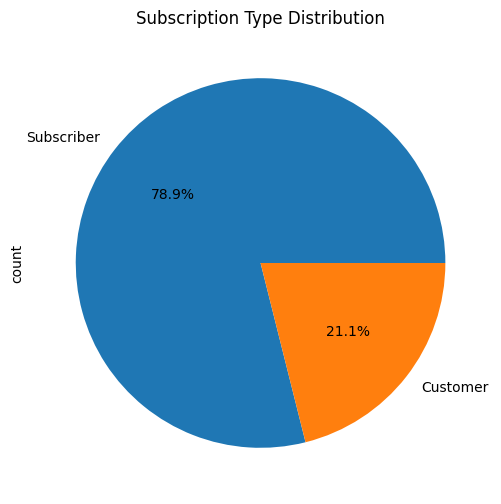

In [15]:
df['subscription_type'].value_counts().plot(kind='pie',autopct = '%1.1f%%',title='Subscription Type Distribution',figsize=(6, 6))
# df.subscription_type.counts().plot(kind='pie')

Please plot the frequency of each subscription option with a bar chart:

<Axes: title={'center': 'subscription_Type_Graph'}, xlabel='subscription_Type', ylabel='Trip_id'>

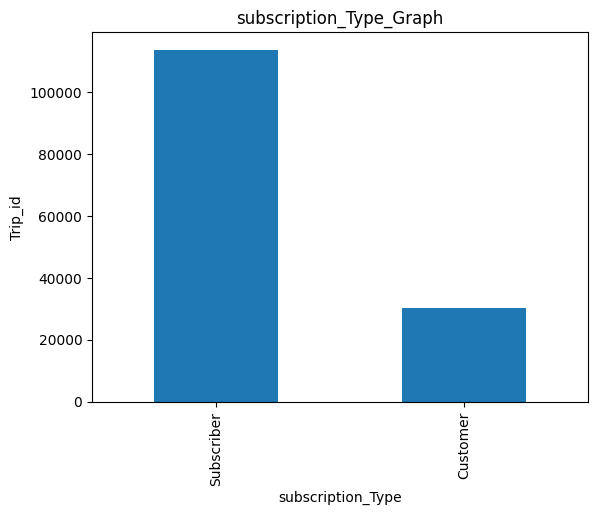

In [16]:
df.subscription_type.value_counts().plot(kind='bar',xlabel='subscription_Type',ylabel='Trip_id',title="subscription_Type_Graph")

Have a look at the start_station column: Which 10 stations occur most frequently?

In [17]:
df.value_counts("start_station").sort_values(ascending=False)[:10]


start_station
San Francisco Caltrain (Townsend at 4th)         9838
Harry Bridges Plaza (Ferry Building)             7343
Embarcadero at Sansome                           6545
Market at Sansome                                5922
Temporary Transbay Terminal (Howard at Beale)    5113
Market at 4th                                    5030
2nd at Townsend                                  4987
San Francisco Caltrain 2 (330 Townsend)          4976
Steuart at Market                                4913
Townsend at 7th                                  4493
Name: count, dtype: int64


Now look at the end_station column: Which 10 stations occur the least often?

In [18]:
df.value_counts("end_station").sort_values(ascending=True)[:10]

end_station
Mezes Park                            5
San Jose Government Center           23
Broadway at Main                     56
San Antonio Shopping Center          93
Franklin at Maple                    93
San Mateo County Center             106
Redwood City Public Library         117
Castro Street and El Camino Real    129
Redwood City Medical Center         178
Broadway St at Battery St           205
Name: count, dtype: int64

Create a table that has start_station segmented by subscription_type and include also the row/column margins (subtotals).<br> If you are not sure how to do it, check out the documentation for ```pd.crosstab()```.

In [19]:

pd.crosstab(df.start_station, df.subscription_type)


subscription_type,Customer,Subscriber
start_station,,
2nd at Folsom,427,3349
2nd at South Park,535,3923
2nd at Townsend,882,4105
5th at Howard,606,2029
Adobe on Almaden,75,260
...,...,...
Temporary Transbay Terminal (Howard at Beale),427,4686
Townsend at 7th,518,3975
University and Emerson,328,106


Let's look at the duration... Which unit do you think is used here?

How long is the shortest trip? How many are that short?

In [20]:
print("shortest duration",df.duration.min())
df.query('duration == 60').count()

shortest duration 60


trip_id              17
duration             17
start_date           17
start_station        17
start_terminal       17
end_date             17
end_station          17
end_terminal         17
bike_num             17
subscription_type    17
zip_code             17
dtype: int64

What do you think is going on with the short trips?

In [21]:
df.query('duration == 60').count()

trip_id              17
duration             17
start_date           17
start_station        17
start_terminal       17
end_date             17
end_station          17
end_terminal         17
bike_num             17
subscription_type    17
zip_code             17
dtype: int64

What is the longest trip?

In [22]:
# print("Longest duration",df.duration.max())
no_days = ((df.duration.max()/60)/60)/24
print(no_days)

8.359212962962962


How would you define a "long" trip? How many trips are "long" according to your definition?

In [23]:
df.query('duration == 722236').count()

trip_id              1
duration             1
start_date           1
start_station        1
start_terminal       1
end_date             1
end_station          1
end_terminal         1
bike_num             1
subscription_type    1
zip_code             1
dtype: int64

Do the long durations seem reasonable? Why are they so long? What could it tell us about the users?

In [24]:
print("Longest duration",df.duration.max())

Longest duration 722236


In [25]:
no_days = ((df.duration.max()/60)/60)/24
print(no_days)

8.359212962962962


Please add your thoughts below:
- I think ...
- I think ...

Plot the duration column.

<Axes: >

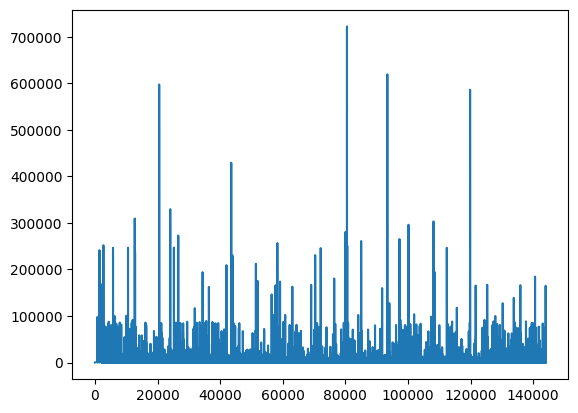

In [26]:

df.duration.plot()

Does this plot give any insights?

Text(0.5, 1.0, 'Distribution of Ride Durations')

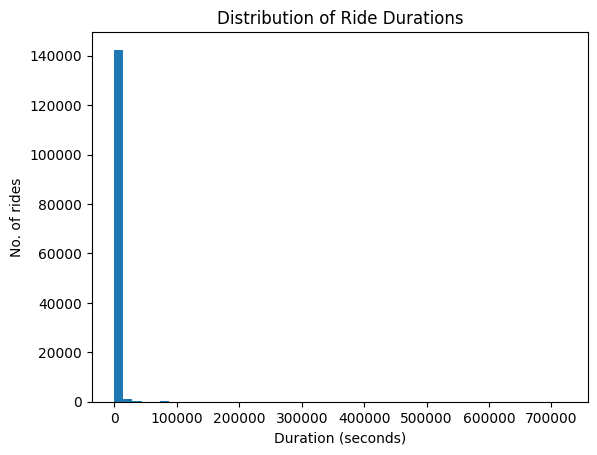

In [17]:
# ⚠️ Why This Plot Doesn’t Help Much:

# This line plot is not very informative because:

# X-axis is just row numbers (not a meaningful variable like time or station).

# Data is noisy — it jumps all over the place.

# Outliers dominate — high-duration rides skew the plot and hide patterns in the bulk of data.


# As alternative we can use histogram to get more insights
df.duration.plot(kind='hist', bins=50)
plt.xlabel('Duration (seconds)')
plt.ylabel('No. of rides')
plt.title('Distribution of Ride Durations')

In [16]:
df.duration.value_counts

<bound method IndexOpsMixin.value_counts of 0            63
1            70
2            71
3            77
4            83
          ...  
144010      385
144011      145
144012      677
144013    64128
144014      570
Name: duration, Length: 144015, dtype: int64>

Select subsections of the data to make plots that provide more insights.

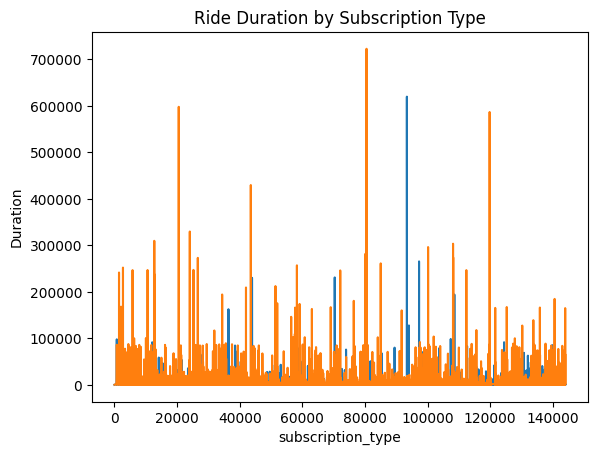

In [20]:
df[df['subscription_type'] == 'Subscriber']['duration'].plot(label='Subscriber')
# df[df['subscription_type'] == 'Customer']['duration'].plot(label='Customer')
df.query('subscription_type == "Customer"')['duration'].plot(label='Customer')
plt.title('Ride Duration by Subscription Type')
plt.ylabel('Duration')
plt.xlabel('subscription_type')
plt.show()

The Product Team would like all of the station names to be lower case and with ```_``` as a separator

```South Van Ness at Market``` -> ```south_van_ness_at_market```

In [49]:
df.head()
cols = df.start_station.tolist()
result = [x.lower().replace(' ', '_') for x in cols]
df.start_station = result
df.head(5)



,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,south_van_ness_at_market,66,8/29/2013 14:14,south_van_ness_at_market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,san_jose_city_hall,10,8/29/2013 14:43,san_jose_city_hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,mountain_view_city_hall,27,8/29/2013 10:17,mountain_view_city_hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,san_jose_city_hall,10,8/29/2013 11:30,san_jose_city_hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,south_van_ness_at_market,66,8/29/2013 12:04,south_van_ness_at_market,67,319,Subscriber,94103


In [50]:
df.head()
cols = df.start_station.tolist()
result = [x.lower().replace(' ', '_') for x in cols]
df.end_station = result
df.head(5)

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,south_van_ness_at_market,66,8/29/2013 14:14,south_van_ness_at_market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,san_jose_city_hall,10,8/29/2013 14:43,san_jose_city_hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,mountain_view_city_hall,27,8/29/2013 10:17,mountain_view_city_hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,san_jose_city_hall,10,8/29/2013 11:30,san_jose_city_hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,south_van_ness_at_market,66,8/29/2013 12:04,south_van_ness_at_market,67,319,Subscriber,94103


Now take a timer and set it to 15 minutes. Take this time to explore the data guided by your own intuition or hypotheses…

    Timeboxing is a helpful approach when working with a new dataset so you won't fall into any rabbit holes.